# 1. Importação das bibliotécas

In [236]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import DescrStatsW
from statsmodels.stats.weightstats import ztest

---

# 2. Leitura dos dados do tmdb

In [124]:
tmdb = pd.read_csv('data/tmdb_5000_movies.csv')

---

# 3. Visualização e descrição dos dados

In [125]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [126]:
tmdb.describe().round(2)

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.00,4803.00,4.803000e+03,4801.00,4803.00,4803.00
mean,2.904504e+07,57165.48,21.49,8.226064e+07,106.88,6.09,690.22
std,4.072239e+07,88694.61,31.82,1.628571e+08,22.61,1.19,1234.59
min,0.000000e+00,5.00,0.00,0.000000e+00,0.00,0.00,0.00
25%,7.900000e+05,9014.50,4.67,0.000000e+00,94.00,5.60,54.00
50%,1.500000e+07,14629.00,12.92,1.917000e+07,103.00,6.20,235.00
75%,4.000000e+07,58610.50,28.31,9.291719e+07,118.00,6.80,737.00
max,3.800000e+08,459488.00,875.58,2.787965e+09,338.00,10.00,13752.00


---

# 4. Visualização gráfica das informações 

### Com normalização

Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000')

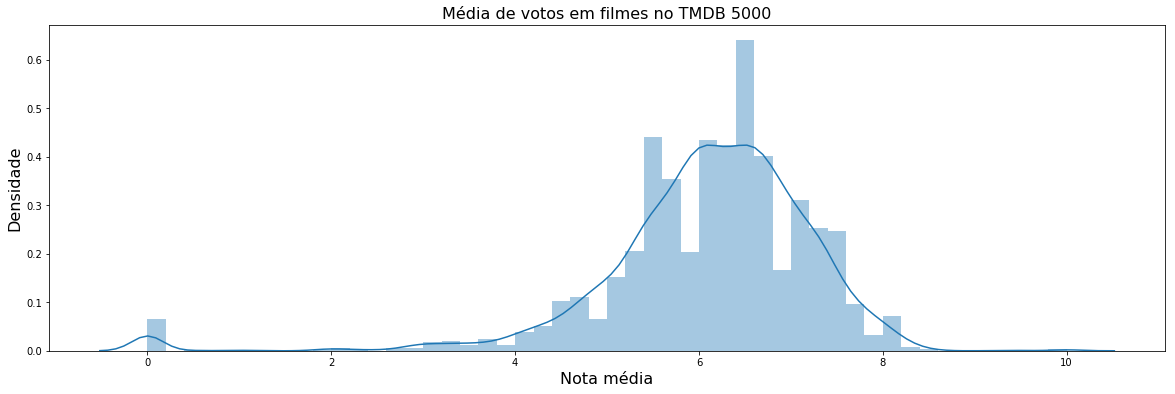

In [127]:
ax = sns.distplot(tmdb.vote_average)
ax.set_xlabel("Nota média", fontsize=16)
ax.set_ylabel("Densidade", fontsize=16)
ax.figure.set_size_inches(20, 6)
ax.set_title('Média de votos em filmes no TMDB 5000', fontsize=16)

### Sem normalização

Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000')

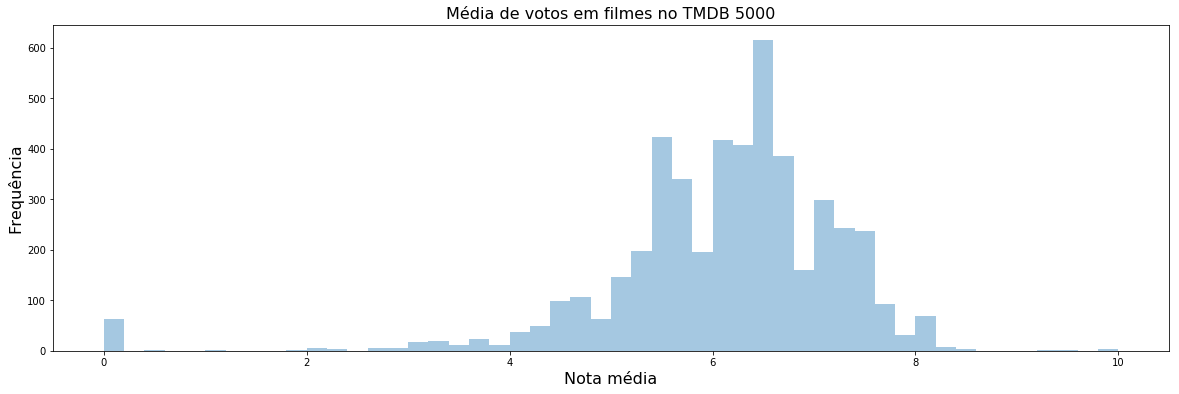

In [128]:
ax = sns.distplot(tmdb.vote_average, norm_hist = False, kde = False)
ax.set_xlabel("Nota média", fontsize=16)
ax.set_ylabel("Frequência", fontsize=16)
ax.figure.set_size_inches(20, 6)
ax.set_title('Média de votos em filmes no TMDB 5000', fontsize=16)

---

# 5. Criação do boxplot

Text(0.5, 1.0, 'Distribuição de nota média dos filmes no TMDB 5000')

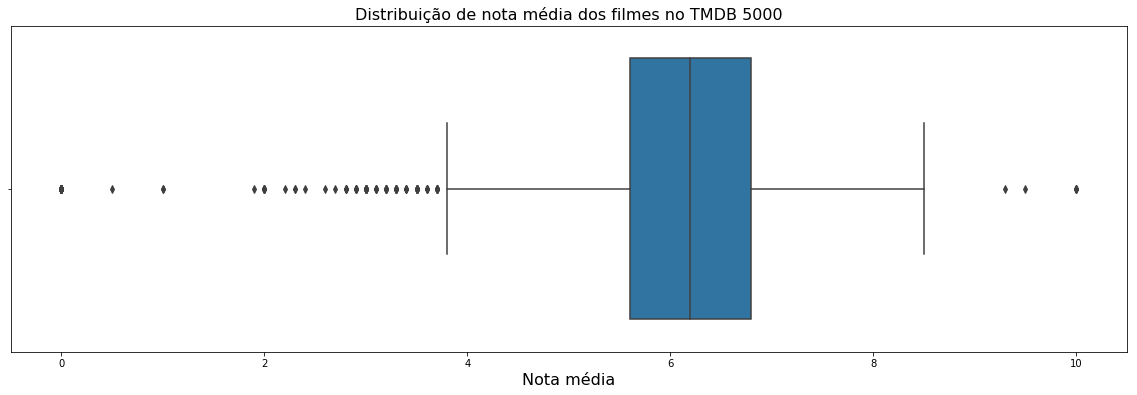

In [129]:
ax = sns.boxplot(tmdb.vote_average)
ax.set_xlabel("Nota média", fontsize=16)
# ax.set_ylabel("Frequência", fontsize=16)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de nota média dos filmes no TMDB 5000', fontsize=16)

### É pouco provável que um filme tenha média 0

---

# 6. Estudo da média 0 e 10

In [130]:
tmdb.query('vote_average == 0').head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0


### Uma parte dos dados com média de votos 0 também tem número de votos igual a 0

In [131]:
tmdb_com_mais_de_10_votos = tmdb.query('vote_count >= 10')

In [132]:
tmdb_com_mais_de_10_votos.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


### Também é estranho filmes com nota 10

---

# 7. Gráficos dos dados tratados

Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000 com mais de 10 votos')

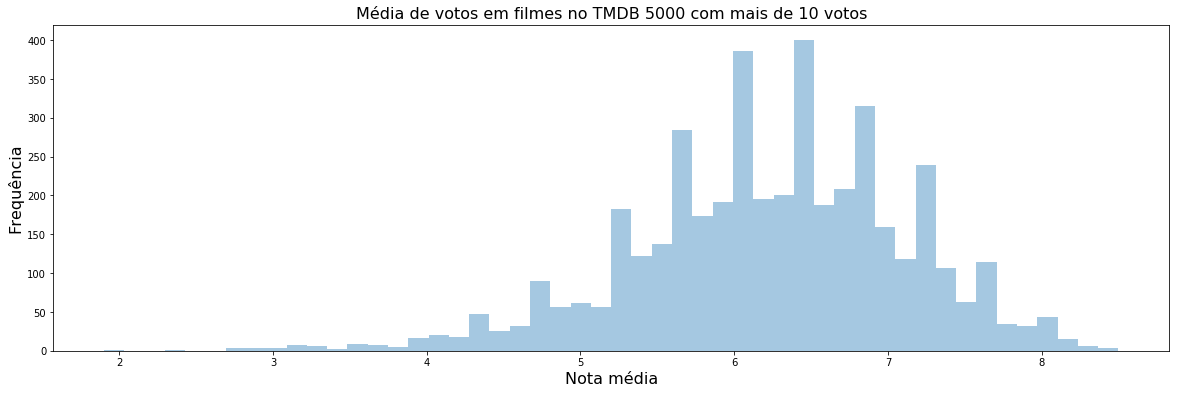

In [133]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average, norm_hist = False, kde = False)
ax.set_xlabel("Nota média", fontsize=16)
ax.set_ylabel("Frequência", fontsize=16)
ax.figure.set_size_inches(20, 6)
ax.set_title('Média de votos em filmes no TMDB 5000 com mais de 10 votos', fontsize=16)

Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000 com mais de 10 votos')

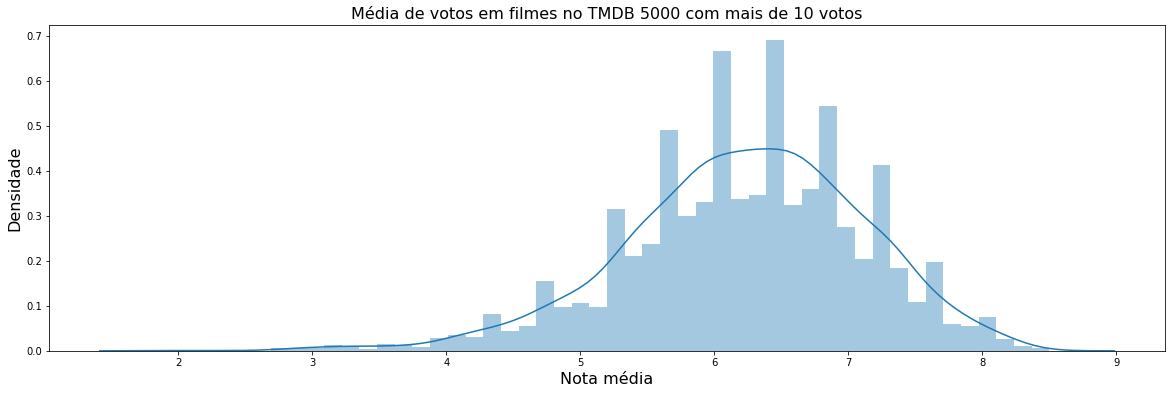

In [134]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average)
ax.set_xlabel("Nota média", fontsize=16)
ax.set_ylabel("Densidade", fontsize=16)
ax.figure.set_size_inches(20, 6)
ax.set_title('Média de votos em filmes no TMDB 5000 com mais de 10 votos', fontsize=16)

Text(0.5, 1.0, 'Distribuição de nota média dos filmes no TMDB 5000 com mais de 10 votos')

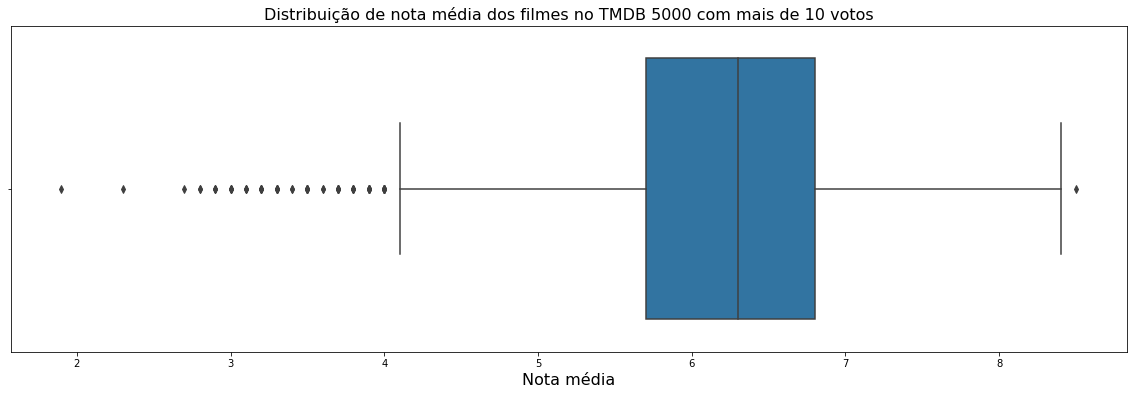

In [135]:
ax = sns.boxplot(tmdb_com_mais_de_10_votos.vote_average)
ax.set_xlabel("Nota média", fontsize=16)
# ax.set_ylabel("Frequência", fontsize=16)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de nota média dos filmes no TMDB 5000 com mais de 10 votos', fontsize=16)

---

# 8. Leitura dos dados do movielens

In [136]:
notas = pd.read_csv('data/ratings.csv')

---

# 9. Visualização das notas

In [137]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Esses dados estão organizados por notas, no dado anterior nós tinhamos as médias, então é necessário fazer o calculo da media desses dados

---

# 10. Calculo das médias

In [138]:
notas_media_por_filme = notas.groupby('movieId').mean()['rating']
notas_media_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

In [139]:
notas_media_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: rating, dtype: float64

---

# 11. Gráfico das notas do movielens

Text(0.5, 1.0, 'Média de votos em filmes no movielens 100K')

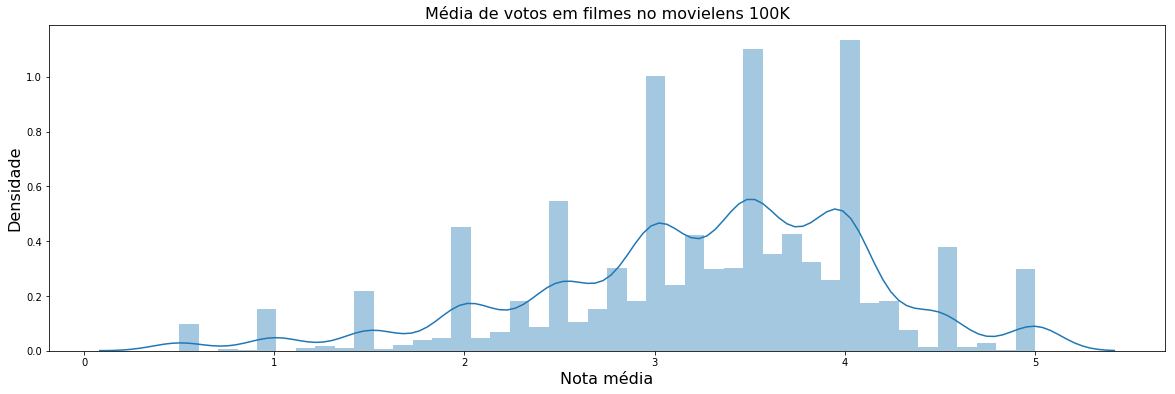

In [140]:
ax = sns.distplot(notas_media_por_filme.values)
ax.set_xlabel("Nota média", fontsize=16)
ax.set_ylabel("Densidade", fontsize=16)
ax.figure.set_size_inches(20, 6)
ax.set_title('Média de votos em filmes no movielens 100K', fontsize=16)

### As notas vão de 0 a 5. Existe filmes com média 5, logo deve ser examinado

---

# 12. Tratamento de dados com média 5

### Separar a quantidade votos por filmes

In [141]:
quantidade_de_votos_por_filme = notas.groupby('movieId').count()
quantidade_de_votos_por_filme.head()

,userId,rating,timestamp
movieId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49


### Tratar e selecionar os indices de filmes com mais de 10 votos

In [142]:
indice_filmes_com_mais_de_10_votos = quantidade_de_votos_por_filme.query('rating >= 10').index
indice_filmes_com_mais_de_10_votos.values

array([     1,      2,      3, ..., 177765, 179819, 187593])

### Separar os filmes com mais de 10 votos

In [143]:
nota_media_dos_filmes_com_mais_de_10_votos = notas_media_por_filme.loc[indice_filmes_com_mais_de_10_votos]
nota_media_dos_filmes_com_mais_de_10_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

---

# 13. Gráfico das notas do movielens com pelo menos 10 votos

Text(0.5, 1.0, 'Média de votos em filmes no movielens 100K')

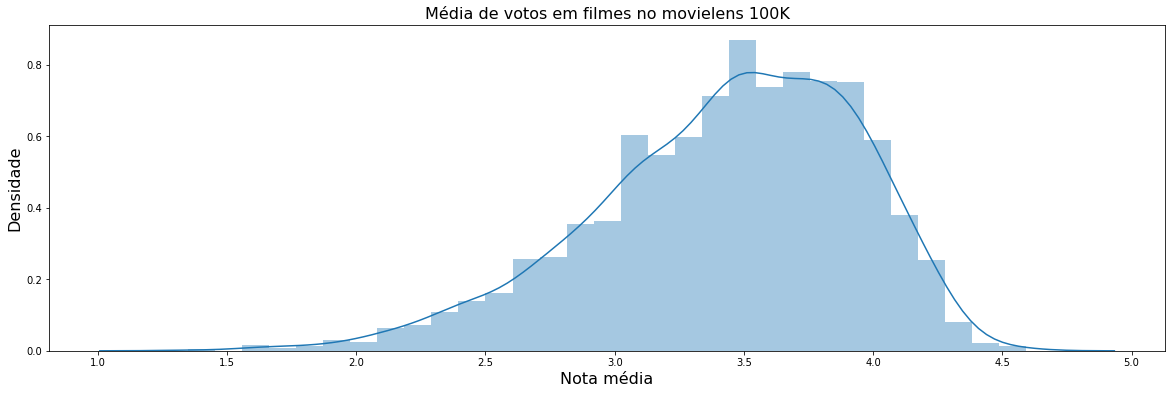

In [144]:
ax = sns.distplot(nota_media_dos_filmes_com_mais_de_10_votos.values)
ax.set_xlabel("Nota média", fontsize=16)
ax.set_ylabel("Densidade", fontsize=16)
ax.figure.set_size_inches(20, 6)
ax.set_title('Média de votos em filmes no movielens 100K', fontsize=16)

Text(0.5, 1.0, 'Distribuição de nota média dos filmes no movielens 100k com mais de 10 votos')

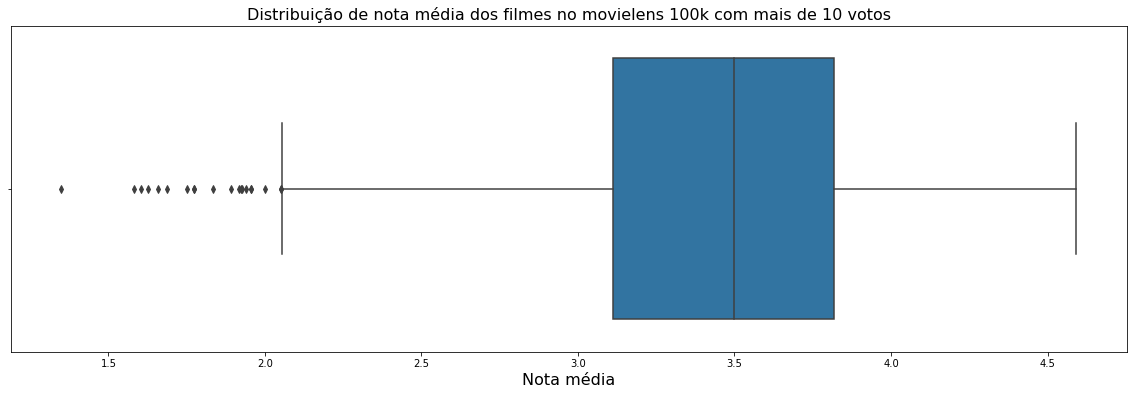

In [145]:
ax = sns.boxplot(nota_media_dos_filmes_com_mais_de_10_votos.values)
ax.set_xlabel("Nota média", fontsize=16)
# ax.set_ylabel("Frequência", fontsize=16)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de nota média dos filmes no movielens 100k com mais de 10 votos', fontsize=16)

# 14. Gráfico acumulativo

Text(0.5, 1.0, 'Média de votos em filmes no movielens 100K')

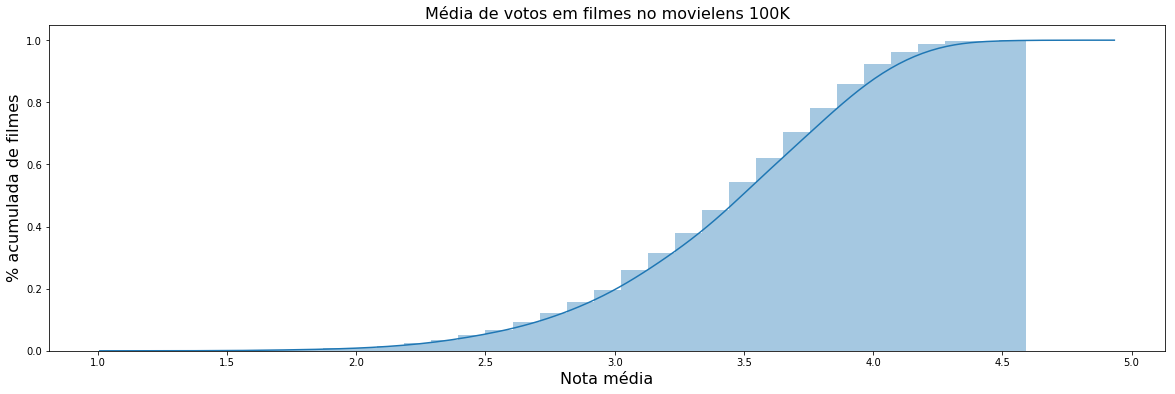

In [146]:
ax = sns.distplot(nota_media_dos_filmes_com_mais_de_10_votos.values,
                 hist_kws = {'cumulative': True},
                 kde_kws = {'cumulative':True})
ax.set_xlabel("Nota média", fontsize=16)
ax.set_ylabel("% acumulada de filmes", fontsize=16)
ax.figure.set_size_inches(20, 6)
ax.set_title('Média de votos em filmes no movielens 100K', fontsize=16)

# 15. Analisando a distribuição dos dados capturados de outros campos do TMDB

In [147]:
tmdb_com_mais_de_10_votos.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Número de votos

In [148]:
tmdb_com_mais_de_10_votos['vote_count'].head()

0    11800
1     4500
2     4466
3     9106
4     2124
Name: vote_count, dtype: int64

Text(0.5, 1.0, 'Número de votos em filmes no TMDB 5000 com mais de 10 votos')

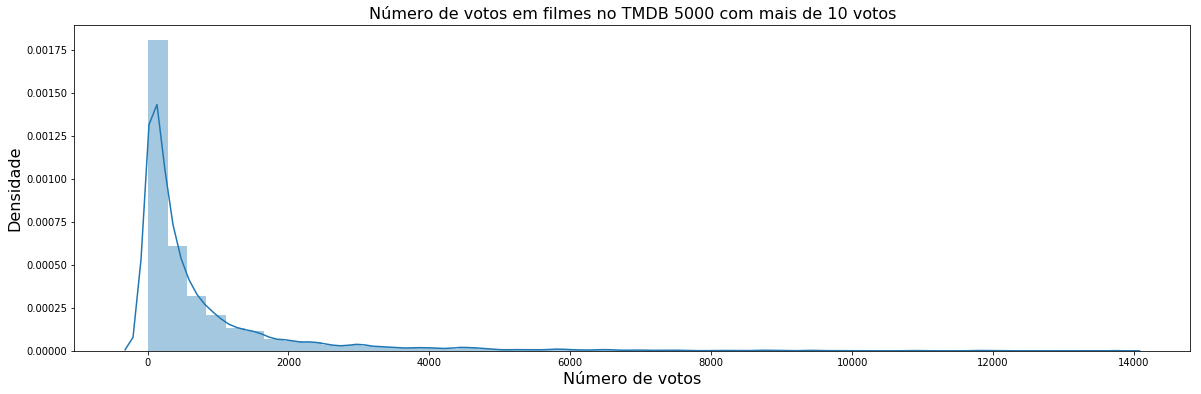

In [149]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_count)
ax.set_xlabel("Número de votos", fontsize=16)
ax.set_ylabel("Densidade", fontsize=16)
ax.figure.set_size_inches(20, 6)
ax.set_title('Número de votos em filmes no TMDB 5000 com mais de 10 votos', fontsize=16)

### Orçamento

In [150]:
tmdb.budget.tail()

4798    220000
4799      9000
4800         0
4801         0
4802         0
Name: budget, dtype: int64

In [151]:
tmdb_com_orcamento_maior_que_zero = tmdb.query('budget > 0')

Text(0.5, 1.0, 'Orçamento dos filmes no TMDB 5000')

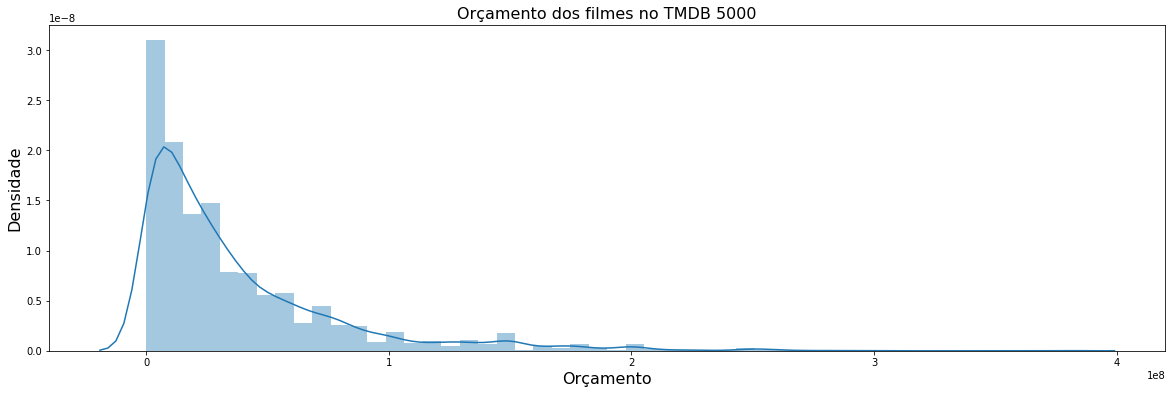

In [152]:
ax = sns.distplot(tmdb_com_orcamento_maior_que_zero.budget)
ax.set_xlabel("Orçamento", fontsize=16)
ax.set_ylabel("Densidade", fontsize=16)
ax.figure.set_size_inches(20, 6)
ax.set_title('Orçamento dos filmes no TMDB 5000', fontsize=16)

### Popularidade

In [153]:
tmdb['popularity'].tail()

4798    14.269792
4799     0.642552
4800     1.444476
4801     0.857008
4802     1.929883
Name: popularity, dtype: float64

In [154]:
tmdb.query('popularity==0')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


Text(0.5, 1.0, 'Popularidade dos filmes no TMDB 5000')

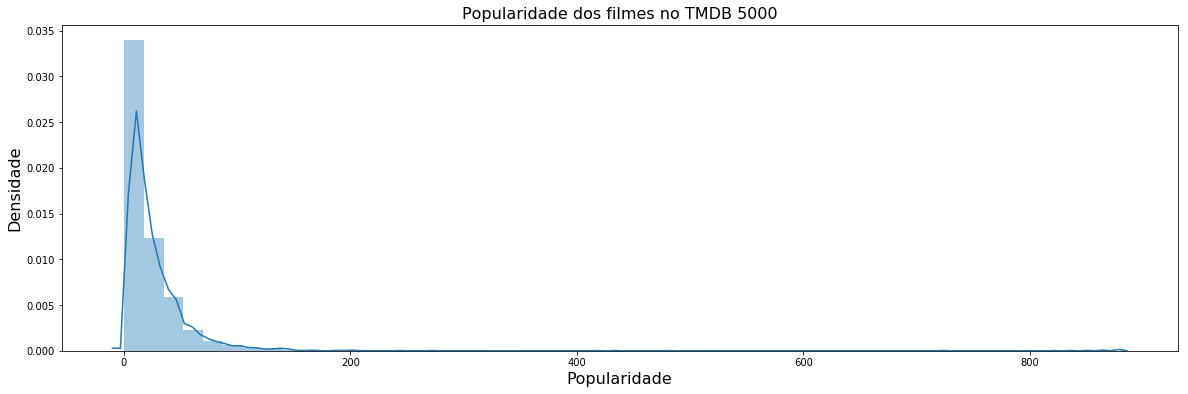

In [155]:
ax = sns.distplot(tmdb['popularity'])
ax.set_xlabel("Popularidade", fontsize=16)
ax.set_ylabel("Densidade", fontsize=16)
ax.figure.set_size_inches(20, 6)
ax.set_title('Popularidade dos filmes no TMDB 5000', fontsize=16)

### Tempo de duração de um filme

In [156]:
tmdb['runtime'].tail()

4798     81.0
4799     85.0
4800    120.0
4801     98.0
4802     90.0
Name: runtime, dtype: float64

In [169]:
tmdb.query('runtime==0').shape

(35, 20)

In [170]:
tmdb_runtime_maior_que_zero = tmdb.query('runtime>0')

Text(0.5, 1.0, 'Duração dos filmes no TMDB 5000')

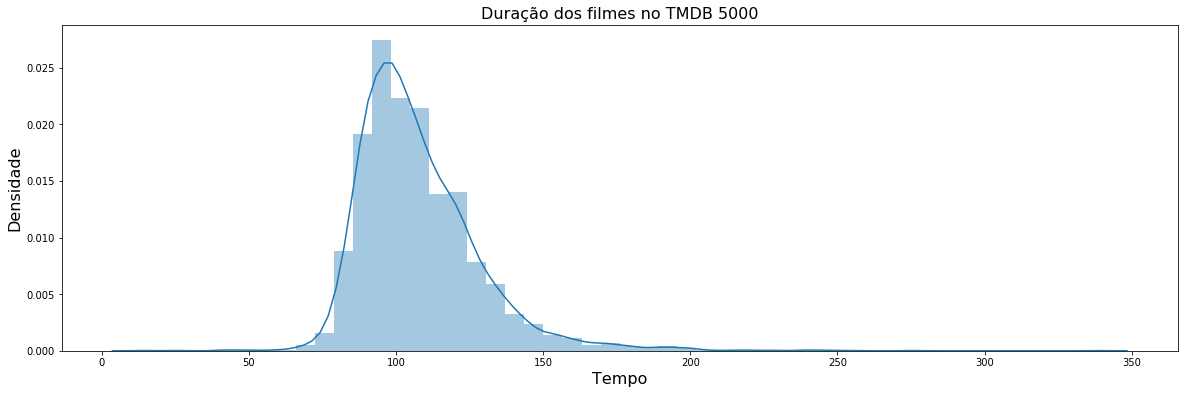

In [174]:
ax = sns.distplot(tmdb_runtime_maior_que_zero['runtime'])
ax.set_xlabel("Tempo", fontsize=16)
ax.set_ylabel("Densidade", fontsize=16)
ax.figure.set_size_inches(20, 6)
ax.set_title('Duração dos filmes no TMDB 5000', fontsize=16)

Text(0.5, 1.0, 'Duração dos filmes no TMDB 5000')

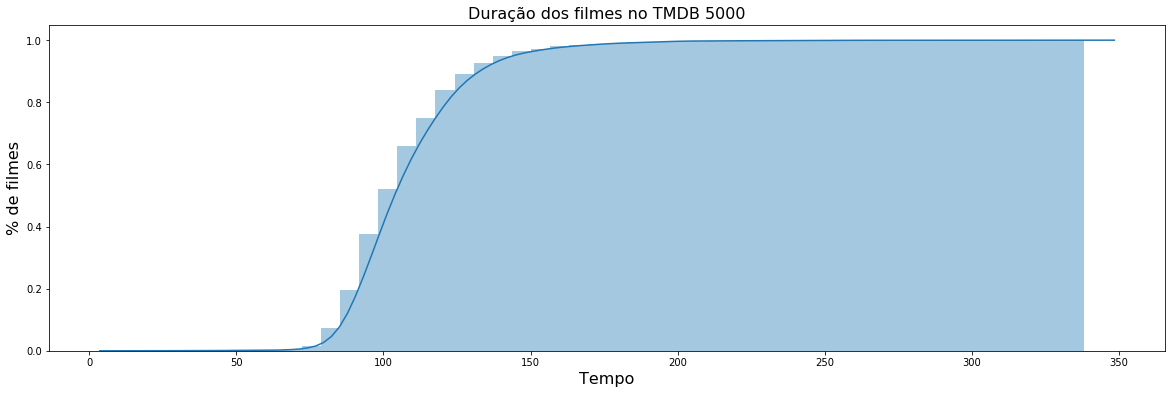

In [176]:
ax = sns.distplot(tmdb_runtime_maior_que_zero['runtime'],
                 hist_kws={'cumulative': True},
                 kde_kws={'cumulative': True})
ax.set_xlabel("Tempo", fontsize=16)
ax.set_ylabel("% de filmes", fontsize=16)
ax.figure.set_size_inches(20, 6)
ax.set_title('Duração dos filmes no TMDB 5000', fontsize=16)

In [178]:
tmdb_runtime_maior_que_zero['runtime'].quantile(0.8)

121.0

#### 20% dos dados possuem 121 minutos

---

# 16. Efeito do tamanho da amostra com os filmes do Movielens

In [179]:
nota_media_dos_filmes_com_mais_de_10_votos.mean()

3.4320503405352603

#### A nota média está acima de 2,5 ( (5 - 0) / 2). Logo em geral, as pessoas dão nota maior que 2,5 para os filmes

In [185]:
nota_media_dos_filmes_com_mais_de_10_votos[0:2].mean()

3.676374207188161

In [186]:
nota_media_dos_filmes_com_mais_de_10_votos[0:3].mean()

3.5374545996639024

In [187]:
nota_media_dos_filmes_com_mais_de_10_votos[0:5].mean()

3.5259741603585653

In [188]:
nota_media_dos_filmes_com_mais_de_10_votos.shape

(2269,)

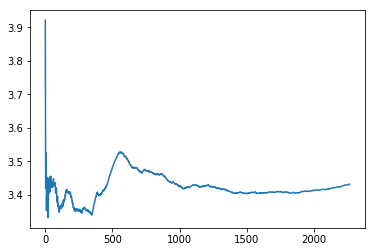

In [193]:
medias = []
for i in range(1, len(nota_media_dos_filmes_com_mais_de_10_votos)):
    medias.append(nota_media_dos_filmes_com_mais_de_10_votos[0:i].mean())
    
plt.plot(medias)
    

### Aleatorizando

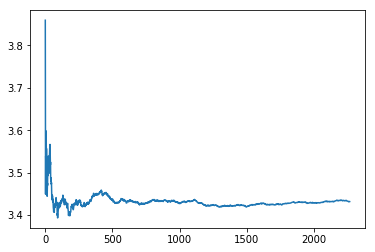

In [201]:
temp = nota_media_dos_filmes_com_mais_de_10_votos.sample(frac=1)
np.random.seed(75243)
medias = []
for i in range(1, len(temp)):
    medias.append(temp[0:i].mean())
    
plt.plot(medias)
    

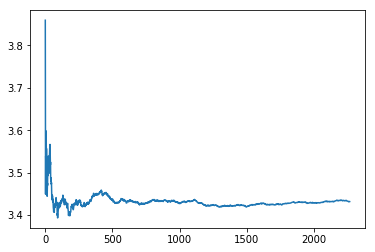

In [202]:
temp = nota_media_dos_filmes_com_mais_de_10_votos.sample(frac=1)
np.random.seed(75243)
medias = []
medias = [temp[0:i].mean() for i in range(1, len(temp)) ]
    
plt.plot(medias)
    

---

# 17. Intervalo de confiança

### Z test

#### Esses método exige normalidade e uma base de dados relativamente grande

In [206]:
zconfint(nota_media_dos_filmes_com_mais_de_10_votos)

(3.4112459477469557, 3.452854733323563)

### T test

In [209]:
descr_todos_com_10_votos = DescrStatsW(nota_media_dos_filmes_com_mais_de_10_votos)

In [210]:
descr_todos_com_10_votos.tconfint_mean()

(3.41123483922938, 3.4528658418411386)

---

# 18. Analisando um filme específico

In [212]:
filmes = pd.read_csv('data/movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [218]:
filme_toy_story = filmes.query('movieId==1')
filme_toy_story

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [223]:
notas_toy_story = notas.query('movieId == 1')
notas_toy_story.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


Text(0.5, 1.0, 'Distribuição das notas do filme toystory no movielens')

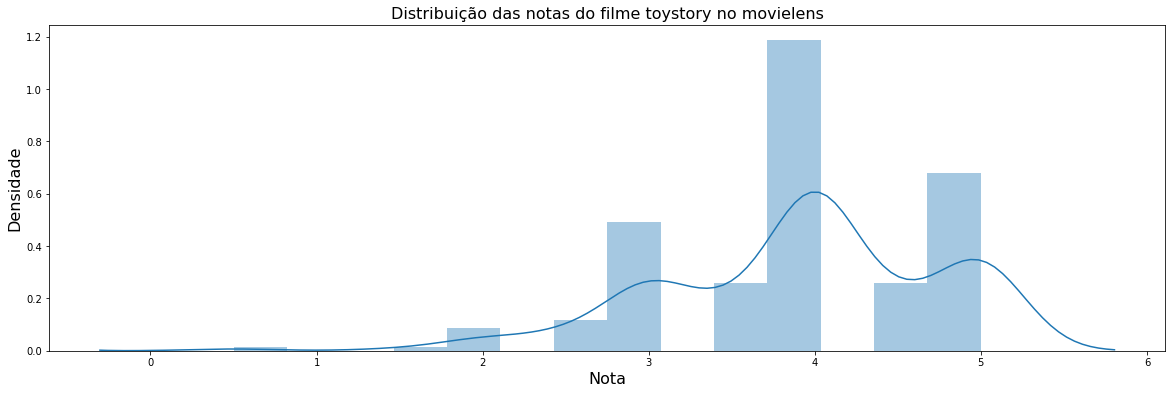

In [227]:
ax = sns.distplot(notas_toy_story['rating'])
ax.set_xlabel("Nota", fontsize=16)
ax.set_ylabel("Densidade", fontsize=16)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição das notas do filme toystory no movielens', fontsize=16)

Text(0.5, 1.0, 'boxplot das notas do filme toystory no movielens')

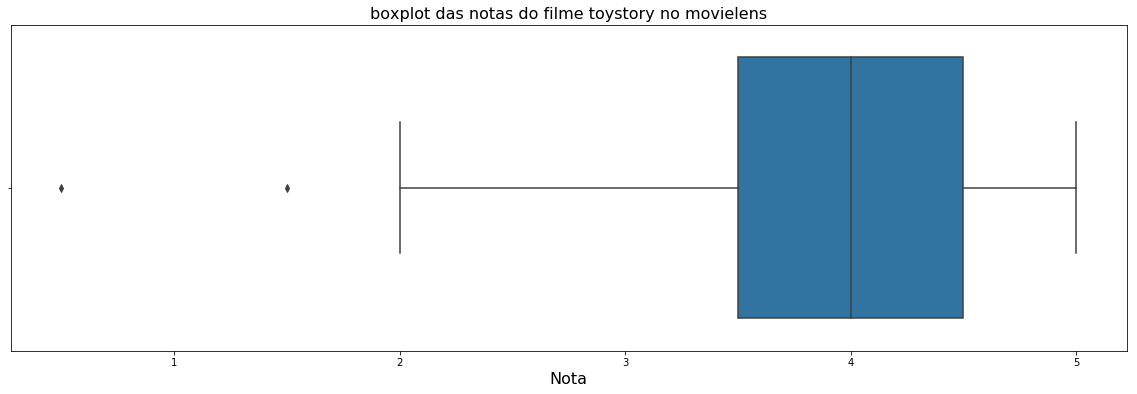

In [228]:
ax = sns.boxplot(notas_toy_story['rating'])
ax.set_xlabel("Nota", fontsize=16)
ax.figure.set_size_inches(20, 6)
ax.set_title('boxplot das notas do filme toystory no movielens', fontsize=16)

In [230]:
notas_toy_story.rating.mean()

3.9209302325581397

In [231]:
notas_toy_story.shape

(215, 4)

In [235]:
zconfint(notas_toy_story.rating)

(3.8093359183563402, 4.032524546759939)

In [243]:
# Hipotese das notas do toy story ser igual à media de todos os filmes
ztest(notas_toy_story.rating, value = 3.4320503405352603)

(8.586342305916716, 8.978190401886942e-18)

### Se o segundo valor for <= 0.05 vou descartar a hipotese

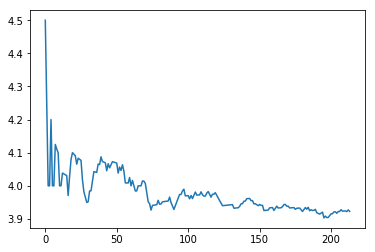

In [247]:
temp = notas_toy_story.rating.sample(frac=1)
np.random.seed(75243)
medias = []
medias = [temp[0:i].mean() for i in range(1, len(temp)) ]
    
plt.plot(medias)